In [1]:
from ebsco_pubs import ebsco_reader as ebsco
from jhu_covid19 import jhu_reader as jhu
from quandl_stocks import quandl_reader as quandl

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

def read_data(ebsco_abs_path, jhu_dir_path, quandl_api_key):
    # Get publication data
    pubs = ebsco.read_data(ebsco_abs_path, "COVID-19");

    # Get covid case data
    covid = jhu.read_data(jhu_dir_path)

    # Get NASDAQ data
    nsdq = quandl.read_data(quandl_api_key)

    pubs.index.name = 'Date'
    covid.index.name = 'Date'
    nsdq.index.name = 'Date'
    return covid, pubs, nsdq

def pool_data(covid, pubs, stocks, normalized=False):
    frames = [covid, pubs, stocks]
    result = pd.concat(frames, axis = 1, sort=True).fillna(0)
    if normalized:
        x = result.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        result = pd.DataFrame(x_scaled, columns=result.columns, index=result.index)
    return result
    
def plot_data(covid, pubs, stocks, pool = None):
    # Find which dataset starts latest
    min_date = max(min(covid.index), min(pubs.index), min(stocks.index))
    # Find which dataset ends first
    max_date = min(max(covid.index), max(pubs.index), max(stocks.index))

    covid_trim = covid.loc[min_date:max_date]
    pubs_trim = pubs.loc[min_date:max_date]
    stocks_trim = stocks.loc[min_date:max_date]
    
    covid.plot()
    plt.title("Confirmed COVID-19 Cases")
    plt.savefig("media/covid.png", format="png")
    plt.show()
    
    pubs.plot() 
    plt.title("Number of COVID-19 Related Academic Publications")    
    plt.savefig("media/publications.png", format="png")
    plt.show()
    
    stocks.plot()
    plt.title("NASDAQ Index History")
    plt.savefig("media/nasdaq.png", format="png")
    plt.show()
    
    if pool is not None:
        pool[['Confirmed', 'Total Published', 'Index Value']].plot()
        plt.title("Confirmed Cases, Published Papers, NASDAQ Index, Normalized")
        plt.savefig("media/combined_normalized.png", format="png")
        plt.show()

Reading EBSCO search data...
Cleaning data...
Building COVID-19 dataset...
	Reading JHU csv files into pandas.DataFrame...
	Building sums across regions...
	Merging, cleaning, and renaming sums...
Done.
Getting NASDAQ index data from Quandl...
Cleaning data...
Done.


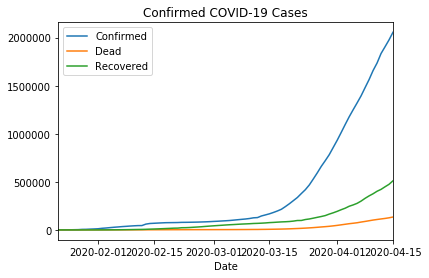

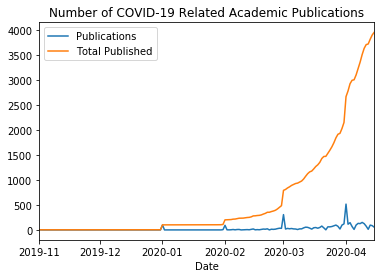

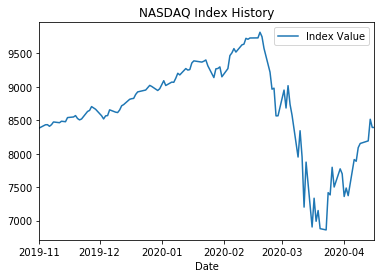

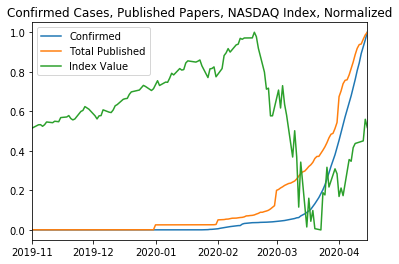

            Confirmed      Dead  Recovered  Publications  Total Published  \
2019-11-01   0.000000  0.000000   0.000000      0.003876         0.000506   
2019-11-02   0.000000  0.000000   0.000000      0.000000         0.000506   
2019-11-03   0.000000  0.000000   0.000000      0.000000         0.000506   
2019-11-04   0.000000  0.000000   0.000000      0.000000         0.000506   
2019-11-05   0.000000  0.000000   0.000000      0.000000         0.000506   
...               ...       ...        ...           ...              ...   
2020-04-11   0.844166  0.808656   0.786879      0.145349         0.937516   
2020-04-12   0.892351  0.850302   0.825257      0.023256         0.940551   
2020-04-13   0.926453  0.890480   0.877961      0.186047         0.964837   
2020-04-14   0.961157  0.938939   0.928069      0.164729         0.986339   
2020-04-15   1.000000  1.000000   1.000000      0.104651         1.000000   

            Index Value  
2019-11-01     0.516058  
2019-11-02     0.521334

In [2]:
import os

slash = os.path.sep
ebsco_path = "ebsco_pubs"+slash+"rawData.xml"
jhu_path = "jhu_covid19"+slash+"COVID-19"+slash+"csse_covid_19_data"+slash+"csse_covid_19_time_series"+slash
quandl_key = "ksramtjbK7R5TQm9NyDs"

covid, pubs, stocks = read_data(ebsco_abs_path=ebsco_path, jhu_dir_path=jhu_path, quandl_api_key=quandl_key)

pool = pool_data(covid=covid, 
                 pubs=pubs,
                 stocks=stocks,
                normalized=True)

pool = pool[:-1]
plot_data(covid, pubs, stocks, pool)